# Homework 2

## Appartment Prices

In [71]:
import pandas as pd

Read the raw csv link and save it as a dataset

In [72]:
df_appartment_prices = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/Booli_sold.csv")

Divide the soldPrice with livingArea to calculate the price per squaremeter.

In [73]:
df_appartment_prices["ppsqm"] = df_appartment_prices["soldPrice"] / df_appartment_prices["livingArea"]

Sort it by ppsqm, present the top five using head function.

In [74]:
df_appartment_prices_sorted = df_appartment_prices.sort_values("ppsqm", ascending = False)
df_appartment_prices_sorted.head(5)

,listPrice,rent,livingArea,rooms,published,constructionYear,objectType,booliId,soldDate,soldPrice,...,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url,ppsqm
67,1595000,1464.0,24.0,1.0,2016-01-07 14:51:06,1935.0,Lägenhet,2018259,2016-01-21,2500000,...,18.055270,NaN,Stockholm,Stockholms län,161,Notar,1566,Broker,http://www.notar.se/,104166.666667
50,1890000,1464.0,24.0,1.0,2016-06-11 08:55:51,1935.0,Lägenhet,2125576,2016-06-21,2450000,...,18.055270,NaN,Stockholm,Stockholms län,161,HusmanHagberg,1610,Broker,http://www.husmanhagberg.se/,102083.333333
54,1795000,1374.0,23.0,1.0,2016-04-15 19:10:49,1935.0,Lägenhet,2078171,2016-04-28,2300000,...,18.055422,True,Stockholm,Stockholms län,135,Notar,1566,Broker,http://www.notar.se/,100000.000000
34,1750000,1144.0,25.0,1.0,2017-05-18 16:20:57,1936.0,Lägenhet,2330886,2017-06-01,2210000,...,18.053880,NaN,Stockholm,Stockholms län,218,HusmanHagberg,1610,Broker,http://www.husmanhagberg.se/,88400.000000
55,1895000,1522.0,26.9,1.0,2016-04-01 22:56:37,1968.0,Lägenhet,2067384,2016-04-19,2300000,...,18.058529,True,Stockholm,Stockholms län,298,Notar,1566,Broker,http://www.notar.se/,85501.858736


Calculate the average using the .mean() function.

In [75]:
average_ppsqm = df_appartment_prices_sorted["ppsqm"].mean()
float(average_ppsqm)

58759.382760081724

I want to examine if the year the appartment where built has any correlation with the ppsqm.

In [76]:
df_appartment_prices_sorted_by_year = df_appartment_prices.sort_values("constructionYear", ascending = True)

Some appartments have no answer on construction year, i need to create a new dataset without these to be able to compare the oldest appartments with the newest. I then use the .tail() and .head() functions to check the 20 newest and 20 oldest appartment. I use the .mean() function to check the average of these samples. 

In [77]:
df_no_na = df_appartment_prices_sorted_by_year.dropna(subset=["constructionYear"])
average_new = df_no_na.tail(20)["ppsqm"].mean()
average_old = df_no_na.head(20)["ppsqm"].mean()

In [78]:
int(average_new)

53924

In [79]:
int(average_old)

65396

### Conclusion

The 20 oldest appartments are on average more expensive per squaremeter then the 20 newest. You could try this with tail/head (30) or (50) and get a similar result.

## The Swedish Election of 2018


Read the file, setting conditions for delimiters, decimals and NA values.

In [80]:
df_election = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/2018_R_per_kommun.csv", delimiter = ";", decimal = ",", na_values = [" ", ""])

I create a new dataset, only containing the the municipalities in "Stockholms län". I then use the .sum() function to count all legitimate votes and present the result as an int. 

In [81]:
df_stockholm = df_election[df_election["LÄNSNAMN"].str.contains("Stockholms län")]
legitimate_total = df_stockholm["RÖSTER GILTIGA"].sum()
int(legitimate_total)

1426237

I save the answer as a variable called "highest_S". To find it i sort the dataframe by the column "S" and then i locate the name of the municipality with highest number with function .iloc[0] (lists start from 0 not from 1). 

In [82]:
highest_S = df_election.sort_values("S", ascending = False).iloc[0]["KOMMUNNAMN"]
highest_S

'Munkfors'

I create a new dataframe only containing the name of the municipality and the voting participitacion. I also sort it by participitacion. Present it with .head(3)

In [97]:
df_sorted_participation_relevent = df_election.sort_values("VALDELTAGANDE", ascending = False)[["KOMMUNNAMN", "VALDELTAGANDE"]]
df_sorted_participation_relevent.head(3)

,KOMMUNNAMN,VALDELTAGANDE
103,Lomma,93.86
59,Habo,93.35
98,Vellinge,93.13


# Predicting Strokes

First read the data and save it as a dataframe.

In [84]:
df_stroke = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv")

I then count how many people have had an heart attack and then calculate the percentage

In [98]:
stroke_total = df_stroke["stroke"].value_counts()
percentage_total = int(stroke_total[1]) / int(stroke_total.sum())

I then do this depending on diffrent variables. Meaning i count the percentage of people that have had a heart attack in the groups that checked "Rural" and "Urban" respectivly.

In [99]:
df_rural = df_stroke[df_stroke["Residence_type"].str.contains("Rural")]
stroke_rural = df_rural["stroke"].value_counts()
percentage_rural = int(stroke_rural[1]) / int(stroke_rural.sum())

In [100]:
df_urban = df_stroke[df_stroke["Residence_type"].str.contains("Urban")]
stroke_urban = df_urban["stroke"].value_counts()
percentage_urban = int(stroke_urban[1]) / int(stroke_urban.sum())

I then do the same with the groups that under "smoking satues" checked "smokes", "never smoked" and "formerly smoked". 

In [101]:
df_smokes = df_stroke[df_stroke["smoking_status"].str.contains("smokes")]
stroke_smokes = df_smokes["stroke"].value_counts()
percentage_smokes = int(stroke_smokes[1]) / int(stroke_smokes.sum())

In [102]:
df_never_smoked = df_stroke[df_stroke["smoking_status"].str.contains("never smoked")]
stroke_never_smoked = df_never_smoked["stroke"].value_counts()
percentage_never_smoked = int(stroke_never_smoked[1]) / int(stroke_never_smoked.sum())

In [103]:
df_formerly_smoked = df_stroke[df_stroke["smoking_status"].str.contains("formerly smoked")]
stroke_formerly_smoked = df_formerly_smoked["stroke"].value_counts()
percentage_formerly_smoked = int(stroke_formerly_smoked[1]) / int(stroke_formerly_smoked.sum())

I then compare with if you have a heart desease

In [116]:
df_have_heart_disease = df_stroke[df_stroke["heart_disease"] == 1]
stroke_have_heart_disease = df_have_heart_disease["stroke"].value_counts()
percentage_have_heart_disease = int(stroke_have_heart_disease[1]) / int(stroke_have_heart_disease.sum())

In [117]:
float(percentage_have_heart_disease)

0.17028985507246377

In [118]:
df_no_heart_disease = df_stroke[df_stroke["heart_disease"] == 0]
stroke_no_heart_disease = df_no_heart_disease["stroke"].value_counts()
percentage_no_heart_disease = int(stroke_no_heart_disease[1]) / int(stroke_no_heart_disease.sum())

I then create a dictionary to have better structure

In [124]:
percentage_dict = { 
    "Total" : percentage_total,
    "Rural" : percentage_rural,
    "Urban" : percentage_urban, 
    "Smokes" : percentage_smokes, 
    "Formerly \n smoked" : percentage_formerly_smoked, 
    "Never \n smoked" : percentage_never_smoked,
    "Have a \n heart \n disease" : percentage_have_heart_disease,
    "Have no \n heart \n disease" : percentage_no_heart_disease}

I create two lists that i want to use for the plot, one with the names of the groups, called "labels", and one with the percantages (multipled by 100 to get it that 0.05 = 5, representing 5%) called percentages.

In [125]:
labels = list(percentage_dict.keys())
percentages = [value * 100 for value in percentage_dict.values()]

I then plot it with matplotlib, using describing labels and title.

In [126]:
import matplotlib.pyplot as plt

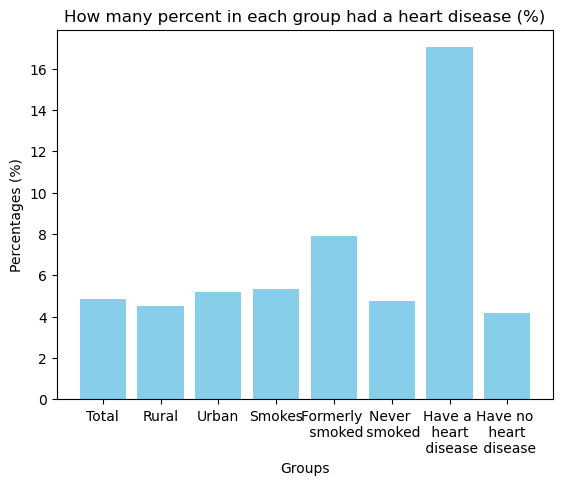

In [127]:
plt.bar(labels, percentages, color='skyblue')
plt.xlabel("Groups")
plt.ylabel("Percentages (%)")
plt.title("How many percent in each group had a heart disease (%)")
plt.show()

### Conclusion

It is hard to draw to many conclusions. The easy one to draw is that if you have a heart disease you have a higher chance of having a stroke then if you dont have one (pretty intuative). What can also be said is that this seem to be much more relevent then your smoking status and if you live in a rural or urban enviroment does not seem to affect this much at all, in comparison. A conclusion that could be drawn, based only on these parameters and dataset, is that you are more likley to get a stroke if you quit smoking then if you continue to smoke. This conclusion seem pretty counter-intuative and you would need to examine this further. One hypothesis for this result could be that you are likley to stop smoking after you have hade a stroke. Also the dataset does not provide info about how long or how much either groups smokes/smoked. 